<a href="https://colab.research.google.com/github/Maureen36Mathenge/Independent-Project-Week-4/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Maureen_Mathenge_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import panda
import pandas as pd
#import numpy 
import numpy as np
import os

In [0]:
#upload data that we shall be using 
df = pd.read_csv("Autolib_dataset.csv",encoding="latin1")
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃÂ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃÂ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [0]:
df.info()
#We have 5000 rows and 25 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

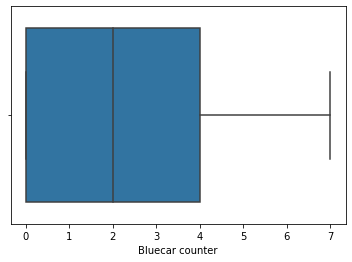

In [208]:
#check for outliers in the BlueCars Column
#Using the boxplot since it gives a visual representation
import seaborn as sns
sns.boxplot(x = df['Bluecar counter']) 
#no ouliers are available in the Bluecars column hence we dont have unreasonable data 

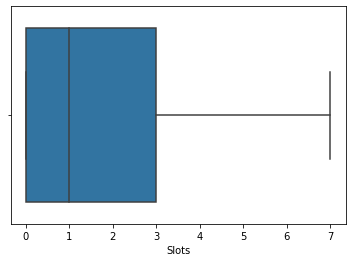

In [209]:
sns.boxplot(x=df['Slots'])
#no outliers have been found on the Slots column. 
#Everyting is on a reasonable range

In [0]:
#check for missing data
df.isnull().sum()
#columns; Displayed comment , Scheduled at  have a lot of missing data
#drop the column cars since it has the data a bluecar counter
df1 = df.drop(["Cars","Displayed comment", "Scheduled at"] ,axis=1)

In [0]:
#checking for duplicates
df.duplicated().sum()
#no duplicates found in the database

0

In [0]:
#check for correlation
df1.corr(method ='kendall')
#we can clearly say that the columns have either strong,weak nor no relationship at all with each other

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
Bluecar counter,1.000000,0.053785,0.077012,-0.264946,0.232869,-0.475883,NaN,NaN,-0.017963,-0.060182,-0.000977
Utilib counter,0.053785,1.000000,0.087396,-0.039485,0.045747,-0.089332,NaN,NaN,0.000105,-0.025813,0.026578
Utilib 1.4 counter,0.077012,0.087396,1.000000,-0.078736,0.044864,-0.139024,NaN,NaN,-0.000033,-0.014977,0.006778
Charge Slots,-0.264946,-0.039485,-0.078736,1.000000,-0.309767,0.439704,NaN,NaN,-0.004176,-0.004096,0.008751
Postal code,0.232869,0.045747,0.044864,-0.309767,1.000000,-0.127798,NaN,NaN,0.005169,0.006822,0.006031
Slots,-0.475883,-0.089332,-0.139024,0.439704,-0.127798,1.000000,NaN,NaN,-0.004887,0.005883,0.010952
year,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
day,-0.017963,0.000105,-0.000033,-0.004176,0.005169,-0.004887,NaN,NaN,1.000000,0.011932,0.012673
hour,-0.060182,-0.025813,-0.014977,-0.004096,0.006822,0.005883,NaN,NaN,0.011932,1.000000,0.002560


In [0]:
#lets find out more on the data
df1.describe()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [210]:
#rename the columns
df1.columns = ['Address','Bluecar','Utilib','Utilibtwo', 'ChargeSlots','ChargingStatus','City','ID','Kind','Geo','Postal','PublicName','RentalStatus','Slots','StationType','Status','Subscription','year','month','day','hour','minute','Datetime']
df1

,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃÂ©nelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃÂ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00


In [211]:
#let's combine day,month and year. also add hour and minute
 #pd.to_datetime((df1.year*10000+df.month*100+df1.day).apply(str),format='%Y%m%d')
df1["Datetime"] = pd.to_datetime(df1[['year', 'month', 'day', 'hour', 'minute']])
df1

,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃÂ©nelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃÂ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00


In [212]:
df01 = df1.sort_values(by=["day","hour" , "minute"], ascending=True)
df01

,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime
1046,112 Rue Monge BÃÂ¢timent Lieu-dit,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,19 place de la Madeleine,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,44 rue SÃÂ©bastien Mercier,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃÂ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2059,2 Avenue Mozart,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,"48.85791, 2.273956",75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00
4453,2 rue Neuve Saint-Pierre,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,12 rue Denfert Rochereau,2,0,0,0,nonexistent,CrÃÂ©teil,creteil-denfertrochereau-12,STATION,"48.7912032, 2.4504989",94000,CrÃÂ©teil/Denfert Rochereau/12,operational,4,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00
2672,11 rue Gerbert,2,0,1,0,operational,Paris,paris-gerbert-11,STATION,"48.8395783, 2.2986453",75015,Paris/Gerbert/11,operational,0,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00
4582,82 rue de CrimÃÂ©e,5,0,0,0,operational,Paris,paris-crimee-82,STATION,"48.882362, 2.386574",75019,Paris/CrimÃÂ©e/82,operational,1,station,ok,nonexistent,2018,4,9,23,56,2018-04-09 23:56:00
3201,21 bis rue Notre-Dame des Victoires,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,"48.8696994, 2.3423247",75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00


In [213]:
df02 = df01[df01.City == "Paris"]
df02

,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime
1046,112 Rue Monge BÃÂ¢timent Lieu-dit,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,19 place de la Madeleine,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,44 rue SÃÂ©bastien Mercier,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃÂ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2059,2 Avenue Mozart,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,"48.85791, 2.273956",75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00
4453,2 rue Neuve Saint-Pierre,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,19 rue BrÃÂ©montier,3,0,0,1,operational,Paris,paris-bremontier-19,STATION,"48.8849507, 2.3035012",75017,Paris/BrÃÂ©montier/19,operational,2,station,ok,nonexistent,2018,4,9,23,42,2018-04-09 23:42:00
2672,11 rue Gerbert,2,0,1,0,operational,Paris,paris-gerbert-11,STATION,"48.8395783, 2.2986453",75015,Paris/Gerbert/11,operational,0,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00
4582,82 rue de CrimÃÂ©e,5,0,0,0,operational,Paris,paris-crimee-82,STATION,"48.882362, 2.386574",75019,Paris/CrimÃÂ©e/82,operational,1,station,ok,nonexistent,2018,4,9,23,56,2018-04-09 23:56:00
3201,21 bis rue Notre-Dame des Victoires,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,"48.8696994, 2.3423247",75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00


In [215]:
#get the difference of bluecars
#this enables one to differentiate hours when the bluecars were picked and returned
df02["difference"] = df02.Bluecar.diff()
df02
#When the diference is a negative,it implies the car has been picked
#Else it has been returned

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime,difference
1046,112 Rue Monge BÃÂ¢timent Lieu-dit,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00,NaN
1107,19 place de la Madeleine,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0
2874,44 rue SÃÂ©bastien Mercier,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃÂ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0
2059,2 Avenue Mozart,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,"48.85791, 2.273956",75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00,1.0
4453,2 rue Neuve Saint-Pierre,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,19 rue BrÃÂ©montier,3,0,0,1,operational,Paris,paris-bremontier-19,STATION,"48.8849507, 2.3035012",75017,Paris/BrÃÂ©montier/19,operational,2,station,ok,nonexistent,2018,4,9,23,42,2018-04-09 23:42:00,3.0
2672,11 rue Gerbert,2,0,1,0,operational,Paris,paris-gerbert-11,STATION,"48.8395783, 2.2986453",75015,Paris/Gerbert/11,operational,0,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00,-1.0
4582,82 rue de CrimÃÂ©e,5,0,0,0,operational,Paris,paris-crimee-82,STATION,"48.882362, 2.386574",75019,Paris/CrimÃÂ©e/82,operational,1,station,ok,nonexistent,2018,4,9,23,56,2018-04-09 23:56:00,3.0
3201,21 bis rue Notre-Dame des Victoires,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,"48.8696994, 2.3423247",75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00,-5.0


In [216]:
df03=df02[(df02.difference < 0)].groupby(["hour"])['difference'].sum()
df03.sort_values(ascending=False).head(1)
#hour 6.00pm is when most of the cars are picked from the station in Paris

hour
18   -78.0
Name: difference, dtype: float64

In [218]:
df03=df02[(df02.difference > 0)].groupby(["hour"])['difference'].sum()
df03.sort_values(ascending=False).head(1)
#Blue cars are returned at 8.00am

hour
8    140.0
Name: difference, dtype: float64

In [183]:
#Most popular station
#get the difference of the bluecars for the whole dataset
df01["difference"] = df01.Bluecar.diff()
df01

,Address,Bluecar,Utilib,Utilibtwo,ChargeSlots,ChargingStatus,City,ID,Kind,Geo,Postal,PublicName,RentalStatus,Slots,StationType,Status,Subscription,year,month,day,hour,minute,Datetime,difference
1046,112 Rue Monge BÃÂ¢timent Lieu-dit,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00,NaN
1107,19 place de la Madeleine,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0
2874,44 rue SÃÂ©bastien Mercier,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃÂ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0
2059,2 Avenue Mozart,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,"48.85791, 2.273956",75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00,1.0
4453,2 rue Neuve Saint-Pierre,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,12 rue Denfert Rochereau,2,0,0,0,nonexistent,CrÃÂ©teil,creteil-denfertrochereau-12,STATION,"48.7912032, 2.4504989",94000,CrÃÂ©teil/Denfert Rochereau/12,operational,4,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00,-4.0
2672,11 rue Gerbert,2,0,1,0,operational,Paris,paris-gerbert-11,STATION,"48.8395783, 2.2986453",75015,Paris/Gerbert/11,operational,0,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00,0.0
4582,82 rue de CrimÃÂ©e,5,0,0,0,operational,Paris,paris-crimee-82,STATION,"48.882362, 2.386574",75019,Paris/CrimÃÂ©e/82,operational,1,station,ok,nonexistent,2018,4,9,23,56,2018-04-09 23:56:00,3.0
3201,21 bis rue Notre-Dame des Victoires,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,"48.8696994, 2.3423247",75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00,-5.0


In [196]:
#They charge and park at this station most
df11= df01["ID"].value_counts().head(1)
df11
#Most people prefer to use the station paris-portedemontrouge-8. 

paris-portedemontrouge-8    13
Name: ID, dtype: int64

In [200]:
 df8=df01[(df01.difference < 0)].groupby(["hour"])['difference'].sum()
df8.sort_values(ascending=False).head(1)
#6.00pm is the most popular hour when people pick the Bluecars

hour
18   -196.0
Name: difference, dtype: float64

In [201]:
#most popular postal code for picking up blue cars
df8=df01[(df01.difference < 0)].groupby(["Postal"])['difference'].sum()
df8.sort_values(ascending=False).head(1)

Postal
94150   -1.0
Name: difference, dtype: float64